In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [32]:
data=pd.read_csv("/content/IIP.csv")

In [33]:
data.to_numpy
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    144 non-null    object
 1   IIP     144 non-null    int64 
 2   Time    144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


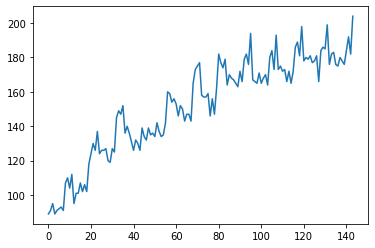

In [34]:
plt.plot(data.IIP)

ORIGINAL IIP DATA


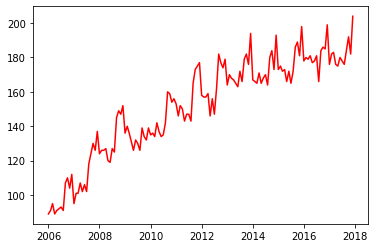

In [35]:
#Upto this level, IIP is not considered as a time series as x axis do not indicat
#Declare the series as time series
rdate=pd.to_datetime(data.Date)
plt.plot(rdate, data.IIP,color="red")
print("ORIGINAL IIP DATA")

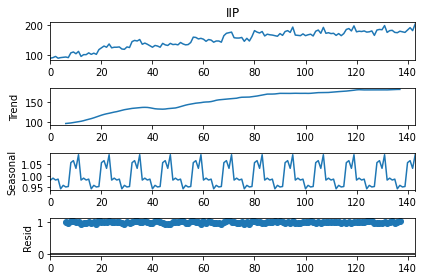

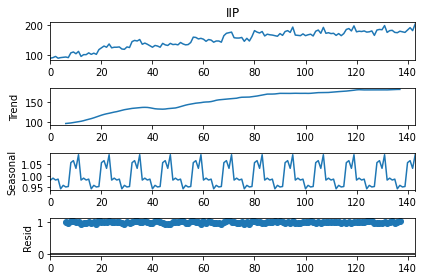

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data['IIP'], model='multiplicable', period=12)
result.plot()

In [37]:
x=[]
for i in range(rdate.shape[0]):
  x.append(rdate[i].year)
j=pd.Series(x)
X=2*(j-(j[(j.shape[0])/2]+j[(j.shape[0])/2])/2)*12

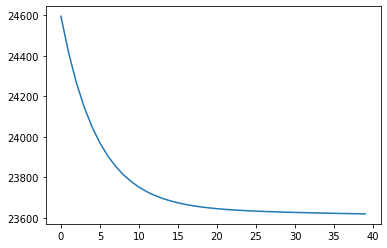

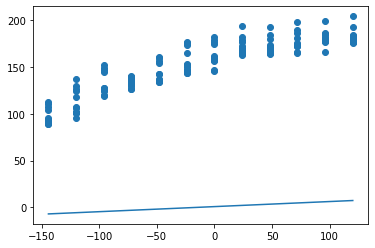

-27.692602639368516


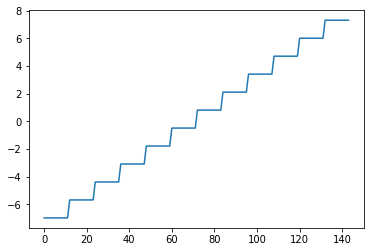

In [38]:
## Trend Analysis and Estimation

Y=data.IIP
N=Y.size
#Gradient descent
i=0
w=np.random.rand()
b=np.random.rand()
l=0.00000005 #learning rate
E=[] #loss function
while (i<40):
  E.append(np.sum((Y-(w*X+b))**2)/N)
  w_derv=np.sum(2*X*(Y-(w*X+b))) #derv=0=>minima
  b_derv=np.sum(2*(Y-(w*X+b)))
  w=w+l*w_derv
  b=b+l*b_derv
  i=i+1
plt.plot(E)
plt.show()
Yh=w*X+b
plt.scatter(X,Y)
plt.plot(X,Yh)
plt.show()
#accuracy, R_square tells ki predicted line mean line se kitna better hai
y_bar=np.mean(Y)
TSS=np.sum((Y-y_bar)**2) #var_mean
RSS=np.sum((Y-Yh)**2)#var_line
R_square=1-(RSS/TSS)
print(R_square)
def MSE(predicted,actual):
  y=0
  for i in range(0,len(actual)):
    x=(predicted[i]-actual[i])**2
    y=y+x
  mse=y/len(actual)
  return mse
MSE(Yh,Y)
plt.plot(Yh)

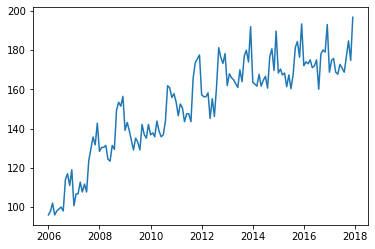

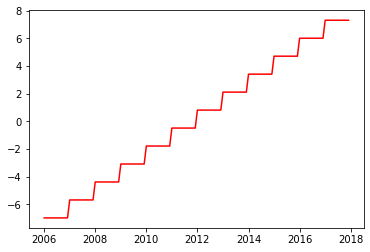

In [39]:
# Detrended Series
residual=(Y-Yh)
data["DT"]=residual
plt.plot(rdate,data["DT"])
plt.show()# Detrend
plt.plot(rdate,Yh,color="red") #Trend

In [40]:
##Removing the seasonality
x=[]
for i in range(rdate.shape[0]):
  x.append(rdate[i].month)
data["Month"]=pd.Series(x)
X=pd.get_dummies(data["Month"])

In [41]:
data=pd.concat([data,X],axis=1)
data.head()

,Date,IIP,Time,DT,Month,1,2,3,4,5,6,7,8,9,10,11,12
0,01-01-2006,89,1,95.990912,1,1,0,0,0,0,0,0,0,0,0,0,0
1,02-01-2006,91,2,97.990912,2,0,1,0,0,0,0,0,0,0,0,0,0
2,03-01-2006,95,3,101.990912,3,0,0,1,0,0,0,0,0,0,0,0,0
3,04-01-2006,89,4,95.990912,4,0,0,0,1,0,0,0,0,0,0,0,0
4,05-01-2006,91,5,97.990912,5,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
Y=data["DT"]

In [44]:
from statsmodels.tsa.arima_model import ARMA
import numpy as np
np.random.seed(1)
model=ARMA(Y,order=(1,1))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [46]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                     DT   No. Observations:                  144
Model:                     ARMA(1, 1)   Log Likelihood                -515.582
Method:                       css-mle   S.D. of innovations              8.599
Date:                Tue, 30 Aug 2022   AIC                           1039.164
Time:                        09:36:36   BIC                           1051.043
Sample:                             0   HQIC                          1043.991
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.7767     23.039      6.414      0.000     102.620     192.933
ar.L1.DT       0.9850      0.015     63.609      0.000       0.955       1.015
ma.L1.DT      -0.3385      0.081     -4.170      0.0